# Why quantum computing?

## What is a computer?

Seeing as you’ve managed to access this webpage, you should already know what a computer is. Today, computers take many forms: From laptops and phones to the systems controlling traffic lights. It seems computers can do anything! These systems can be very complex and specialised, but they all have one thing in common: A computer carries out a set of instructions on some input information to give us some new (output) information.

The instructions we give computers need to be very specific and unambiguous. We call these sets of instructions _algorithms,_ and a lot of the research into computers is into the behaviour of different algorithms. In this course, we will only consider computers in their simplest form; no keyboards, mice, or screens- just information and algorithms.

![An artists rendering of basically all computers](images/why-qc/basically_all_computers.png)

## Classifying computer algorithms

To understand the role of quantum computers amongst modern traditional computers, we first need to learn how we measure the performance of different algorithms.

In computer science, we classify algorithms on how the [resources](gloss:resources) they use grow with the size of the input. We call this the algorithm’s _complexity_. For example, an algorithm that decides if a number is even only needs to look at the last digit in that number. In this case, the ‘input’ is a number, and the output is either ‘Even’ or ‘Odd’. We call this a _constant time_ algorithm, because the time the algorithm takes to complete doesn't depend on the size of the input number. It might take different computers different amounts of time to get this result, but that’s due to other factors and not the length of the input.

![The steps of an algorithm that works out if a number is even or odd](images/why-qc/odd-even-algo.svg)

Let’s look at a different example. This time, the input is two numbers of equal length, and the problem is to add them together. In this case the output will be a new number. When adding two multi-digit numbers, a common algorithm you probably learnt at school starts with the rightmost digit from each number and adds them together. It then moves one digit to the left (carrying over a ‘1’ if the result was greater than 9) and repeats the process. The computer repeats this until there are no more digits to add, and the algorithm ends.

![Animation showing the steps of an addition algorithm](images/why-qc/adding-algo.svg)

<!-- ::: q-block.exercise -->

### How complex is addition?

<!-- ::: q-quiz(goal="intro-why-qc-0") -->

<!-- ::: .question -->

The time this addition algorithm takes to complete...

<!-- ::: -->

<!-- ::: .option(correct) -->

1. ...grows linearly (proportionally) with the length of the input number (linear time).

<!-- ::: -->

<!-- ::: .option -->

2. ...is not affected by the length of the input number (constant time)

<!-- ::: -->

<!-- ::: .option -->

3. ...grows with the square of the length of the input number (quadratic time) 

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

Again, different computers will execute this algorithm at different speeds; a laptop can perform addition millions of times faster than a human can. But whether you can do a million operations a second or just one, the rate of growth will be the same.

![graph of constant and linear running times vs input sizes for different running times](images/why-qc/graph-linear-constant.svg)

Here is one final example that is very particularly interesting to us. Let’s say I have a secret number (such as a PIN), and the problem is to guess it. In this case, the size of the problem is the length of the number.  

Let’s say the only way we can check if our answer is correct is by punching it into a keypad. Since we have no information about what that number might be, the best algorithm to find this secret number uses a ‘brute-force’ method, which means it does nothing clever and simply tries every possible number.

How long would this take? Now, in theory we could get lucky and guess the answer in one go, but this is very unlikely. On average, we’d have to try around half the possible inputs, so the running time of our algorithm is proportional to the number of possible combinations. The question now becomes: How does the number of possible combinations grow with the length of the secret number?

![Animation showing the steps of a brute-force search algorithm](images/why-qc/search-algo.svg)

Each digit we add to our secret number multiplies the number of possible combinations by 10. E.g. a secret number with 1 digit has 10 possible values (0, 1, 2, 3, 4, 5, 6, 7, 8 & 9), and a secret number with 2 digits has 100 possible values.  Assuming the time taken to guess each digit takes the same amount of time (regardless of the length), we can represent this mathematically like so:

$$ \cssId{T}{T} \cssId{prop_to}{\propto} 10^\cssId{exp}{d}$$

You will notice the number of digits (d) is the exponent in this equation, and as such we say this is an _exponential time_ algorithm, and that the running time grows exponentially with the length of the input.

![graph of constant, linear and exponential running times vs input sizes for different running times](images/why-qc/graph-all.svg)

## Why do we measure algorithms like this?

Different computers have different strengths; certain operations might be faster on one computer than another. By studying growth vs input size, we can ignore device-specific details and actually measure the _algorithm_, instead of the specific combination of algorithm and computer. Importantly, knowing how an algorithm scales with input size also tells us whether the algorithm will grow manageably or not.

Let’s think about the linear-time addition algorithm we saw above. If we could add two 10-digit numbers in one second, due to the linear rate of growth, we should be able to add two 20-digit numbers in two seconds. Each extra 10 digits should add roughly one more second to our computation time.

To contrast, imagine you could find a 10-digit PIN in 1 second using the exponential-time search algorithm above. This means your computer is fast enough to try \~5,000,000,000 combinations per second. We would expect this computer using this algorithm to take roughly 5,000,000,000 seconds (\~150 years) to find a 20-digit PIN. Adding another 10 digits increases this to around 150,000,000,000 years (\~120x the age of the universe). Exponential-time algorithms with even a modestly sized input (in this case \~30 digits) can become not just difficult, but literally impossible to carry out.

While this PIN-finding problem is an artificial example we intended to be as simple as possible, there are many real problems in computer science for which we only have inefficient algorithms. Despite the impressive speed of today’s computers, these [intractable](gloss:intractable) problems can be too difficult for even the largest supercomputers.

But if we can find algorithms that grow more efficiently, these intractable problems may suddenly become manageable, even with relatively slow or unreliable computers. This is where quantum computing comes in.

## How can quantum computing help?

So far, we have thought of algorithms in a very abstract way, but the computers that execute these algorithms must exist in the real world. Whether these computers are high-powered microchips, or humans with pens and paper, all computers are ultimately governed by the laws of physics, and the operations they can perform limit the algorithms we can create.

Physics is an attempt to work out the set of rules everything in the universe follows. Around the early 20th century, through delicate experiments in laboratories, physicists saw strange behaviours which their current physics could not explain. This meant the rules weren’t quite accurate, so they developed the more complete ‘quantum’ physics, which describes this behaviour very well.

Physicists created quantum physics to explain behaviour they'd never seen before, and computer scientists found they could (in theory) exploit this newly discovered behaviour to create more efficient algorithms. As a result, there are certain problems that we believe are intractable for conventional computers, but are manageable for a ‘quantum’ computer that can exploit this behaviour. One such problem is _integer factorisation_.


Say we have an integer we'll call '$x$'. A factorizing algorithm finds the integers $p$ and $q$ such that $p×q = x$. This is sometimes easy; you can tell at a glance that $2000 = 2 × 1000$, but if $x$ is the product of two large prime numbers, this problem becomes very difficult. When we talk about integer factorisation, we’re going to assume the most difficult (worst-case) scenario. In the code cell below, we’re assigning a 250-digit number to the variable <code>x</code>:

In [1]:
# pylint: disable=line-too-long, invalid-name
x = 2140324650240744961264423072839333563008614715144755017797754920881418023447140136643345519095804679610992851872470914587687396261921557363047454770520805119056493106687691590019759405693457452230589325976697471681738069364894699871578494975937497937

In 2020, researchers factorised this number using a classical supercomputer and ~2700 [core-years](gloss:coreyears) of processing power. This was a large effort, and record breaking at the time of writing. We can verify their results in the code cell below (fortunately, we do have efficient algorithms for multiplication!):

In [2]:
p = 64135289477071580278790190170577389084825014742943447208116859632024532344630238623598752668347708737661925585694639798853367
q = 33372027594978156556226010605355114227940760344767554666784520987023841729210037080257448673296881877565718986258036932062711

p*q == x  # Evaluates to 'True'

True

The output shown is the value of the last line of the cell. In this case we can see that <code>p*q == x</code> evaluates to <code>True</code>. Although not mathematically proven, we're pretty sure there’s no efficient algorithm for factoring such numbers on traditional computers. In fact, much of the internet’s encryption relies on the assumption that this problem is intractable, and that factoring a 617-digit [RSA](gloss:RSA) number is impossible. In contrast, we know of efficient factoring algorithms for quantum computers that, once we have big enough quantum computers, we estimate could factorise these numbers in under a day.

## Where are we now?

We now know that quantum computers can carry out more efficient algorithms, but the quantum computers we have today are too small and unstable to give an advantage over traditional computers. 

At a very simple level, there are two factors that limit the size of problems our quantum computers can solve. The first is the amount of data they can store and work on, which we usually measure in [_qubits_](gloss:qubits). If we don’t have enough qubits, we simply can’t store and operate on problems above a certain size. The second is the error rate of our quantum computer; since we only see quantum behaviour in delicate laboratory experiments, creating quantum computers is a delicate process. The quantum computers we have right now are noisy, which means they often get things wrong and introduce ‘[noise](gloss:noise)’ into our results. Too much noise and our results will be nonsense!

At the moment, the quantum computers we have are experimental. They're limited by qubit counts and error rates, so the biggest problems they can currently solve are still easily manageable for conventional computers. 

At some point in the future, this will change. We will reach ‘quantum advantage’, in which it will actually make economic sense to solve a problem using a quantum computer over a conventional computer. How do we know? _Because we measure algorithms by their rate of growth!_ We know that, as long as quantum computers keep developing steadily, they will eventually take over classical computers.

![comparison of (projected) classical vs quantum factoring abilities over time](images/why-qc/q-vs-c.svg)

The estimate for factoring a 617-digit RSA number in under a day assumed ~20 million noisy qubits. At the time of writing, IBM currently has a 65-qubit quantum computer, and is aiming to create a system with over 1000 qubits by 2023. There are other algorithms that we believe will give us a quantum advantage long before this milestone, but it may still seem we are a long way off.

Using the code below, you can create a simple quantum program and submit it to IBM Quantum to run on a real quantum computer. IBM Quantum will run this program for us 4000 times. Our program is probabilistic, and the results should be `000` half the time, and `111` the rest of the time. As you can see, these are not the only results, we have a small probability of measuring other outputs due to noise.

Running on ibm_geneva
Job Status: job has successfully run


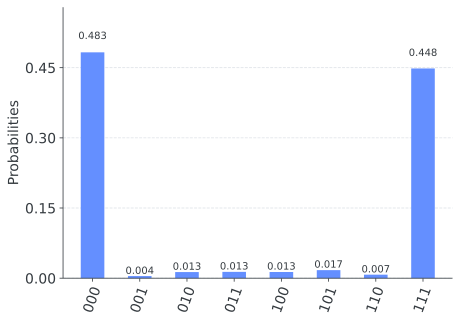

In [1]:
# 1. Create a simple quantum program called a 'quantum circuit'.
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, [1, 2])
qc.measure_all()

# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
# IBMQ.save_account(token="XYZ")
# IBMQ.load_account()
from qiskit.providers.ibmq import IBMQ, least_busy
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
from qiskit import transpile
transpiled_qc = transpile(qc, device)

# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.
from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

# 5. Plot the results as a histogram.
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())

We should remind ourselves of where conventional computers came from. Below is a picture of the first [transistor](gloss:transistor), created in 1947. Transistors are the building blocks of modern computer processors.

![comparison of (projected) classical vs quantum factoring abilities over time](images/why-qc/first-transistor.jpg)
Image credit: Federal employee <a href="https://clintonwhitehouse4.archives.gov/Initiatives/Millennium/capsule/mayo.html">Link</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=554340">Public Domain</a>.

70 years later, our modern computer chips can contain billions of transistors.

In the rest of this course, we will explore the quantum effects that allow us to create more efficient algorithms. By the end of this course you will be able to use the software package, [Qiskit](gloss:qiskit), to program a quantum computer to run one of these algorithms.

<!-- ::: q-block.exercise -->

### Quick quiz

<!-- ::: q-quiz(goal="intro-why-qc-1") -->

<!-- ::: .question -->

Quantum computers will eventually...

<!-- ::: -->

<!-- ::: .option(correct) -->

1. ...do computations that are too difficult for conventional computers.

<!-- ::: -->

<!-- ::: .option -->

2. ...replace conventional computers. 

<!-- ::: -->

<!-- ::: .option -->

3. ...increase the speed of conventional computers.

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->